## BLM19432E Introduction to Data Science Final Project
-------
### Deadline: 21.05.2024: 13:00 pm
------

**Important Notes:** Change this file name to **GroupID_Final.ipynb**

### Part 1. Dataset and features description

- a) **Motivation:** What problem are you tackling?
- b) **Dataset:** Explain your da and features.tt?



Motivation: The problem being tackled here is understanding the factors that contribute to passenger satisfaction or dissatisfaction in the context of airline travel. 

Dataset and Features:
- Dataset Description: This dataset comprises a collection of responses from an airline passenger satisfaction survey. It contains various attributes related to passengers' demographics, flight details, and their satisfaction ratings for different aspects of the travel experience.

- Features Description:
  1. Gender: Gender of the passengers (Female, Male).
  2. Customer Type: Indicates whether the passenger is a loyal customer or a disloyal customer.
  3. Age: The actual age of the passengers.
  4. Type of Travel: Purpose of the flight, categorized as either Personal Travel or Business Travel.
  5. Class: Travel class in the plane, categorized as Business, Eco, or Eco Plus.
  6. Flight Distance: The distance of the flight journey.
  7. Inflight Wifi Service: Satisfaction level regarding the inflight wifi service, ranging from 0 (Not Applicable) to 5.
  8. Departure/Arrival Time Convenience: Satisfaction level regarding the convenience of departure and arrival times.
  9. Ease of Online Booking: Satisfaction level regarding the ease of online booking process.
  10. Gate Location: Satisfaction level regarding the gate location.
  11. Food and Drink: Satisfaction level regarding the food and drink service.
  12. Online Boarding: Satisfaction level regarding the online boarding process.
  13. Seat Comfort: Satisfaction level regarding the seat comfort.
  14. Inflight Entertainment: Satisfaction level regarding the inflight entertainment.
  15. On-board Service: Satisfaction level regarding the on-board service.
  16. Leg Room Service: Satisfaction level regarding the leg room service.
  17. Baggage Handling: Satisfaction level regarding the baggage handling.
  18. Check-in Service: Satisfaction level regarding the check-in service.
  19. Inflight Service: Satisfaction level regarding the inflight service.
  20. Cleanliness: Satisfaction level regarding the cleanliness of the airplane.
  21. Departure Delay in Minutes: Minutes delayed during departure.
  22. Arrival Delay in Minutes: Minutes delayed during arrival.
  23. Satisfaction: Airline satisfaction level, categorized as Satisfaction, Neutral, or Dissatisfaction.


### Part 2. Exploratory data analysis (EDA)

- a) Explain the shape of the dataset  
- b) Explain the features types in the dataset. Explain in detail if there are any problems
- c) Perfrom all additional EDA steps that you consider necessary.
   


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import warnings
from colorama import Fore
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
fileDir ='train.csv'
data=pd.read_csv(fileDir)

In [4]:
data.shape

(103904, 25)

In [5]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [7]:
data.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [8]:
data = data.drop(data.iloc[:,[0, 1]], axis = 1)

In [9]:
pd.value_counts(data.dtypes)

C:\Users\Ceren\AppData\Local\Temp\ipykernel_5536\93055623.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data.dtypes)


int64      17
object      5
float64     1
Name: count, dtype: int64

In [10]:
data.select_dtypes(exclude="number").head(5)

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied


The dataframe without number features of dataset

In [11]:
data.Class.nunique()

3

number of unique values in the 'Class' column of the 'data' dataset.

In [12]:
data.Class.unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [13]:
data.values

array([['Male', 'Loyal Customer', 13, ..., 25, 18.0,
        'neutral or dissatisfied'],
       ['Male', 'disloyal Customer', 25, ..., 1, 6.0,
        'neutral or dissatisfied'],
       ['Female', 'Loyal Customer', 26, ..., 0, 0.0, 'satisfied'],
       ...,
       ['Male', 'disloyal Customer', 30, ..., 7, 14.0,
        'neutral or dissatisfied'],
       ['Female', 'disloyal Customer', 22, ..., 0, 0.0,
        'neutral or dissatisfied'],
       ['Male', 'Loyal Customer', 27, ..., 0, 0.0,
        'neutral or dissatisfied']], dtype=object)

array containing all the values in the 'data' dataset, including both the index and column labels.

In [14]:
data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [15]:
#For not number values
data.describe(exclude="number").head(5)

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


a summary of the non-numeric (categorical) columns in the dataset. It includes counts, unique values, the most frequent value, and the frequency of the most frequent value for each categorical column.

In [16]:
np.sum(data.Class == "Eco")

46745

In [17]:
uniqueVal = data.select_dtypes(include="number").nunique().sort_values()
print(uniqueVal)

Baggage handling                        5
Seat comfort                            6
Cleanliness                             6
Inflight wifi service                   6
Departure/Arrival time convenient       6
Ease of Online booking                  6
Gate location                           6
Food and drink                          6
Online boarding                         6
Inflight service                        6
Inflight entertainment                  6
On-board service                        6
Leg room service                        6
Checkin service                         6
Age                                    75
Departure Delay in Minutes            446
Arrival Delay in Minutes              455
Flight Distance                      3802
dtype: int64


selects the numerical columns from the dataset and calculates the number of unique values for each numerical column. It then sorts these unique value counts in ascending order

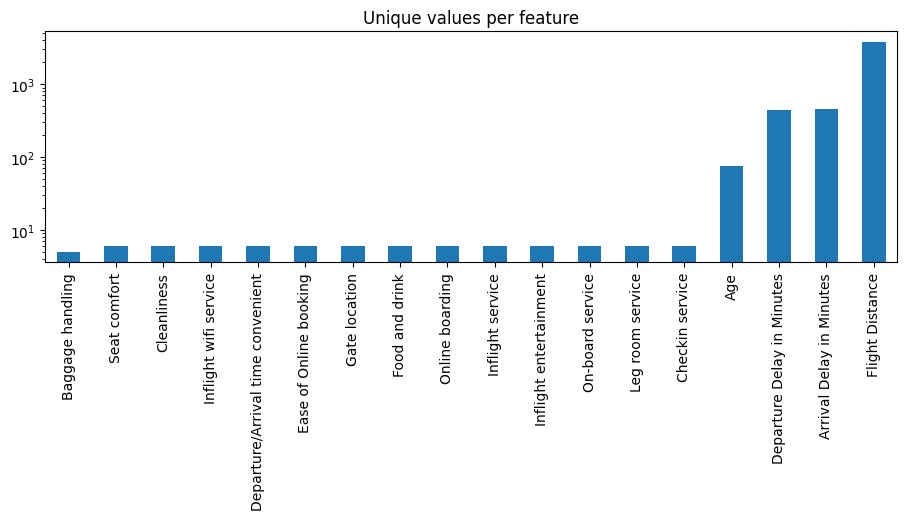

In [18]:
uniqueVal.plot.bar(logy=True, figsize=(11, 3), title="Unique values per feature");

### Part 3. Visual analysis of the features

- a) Explain the distribution of some important features in your dataset using visualizations.
- b) Perfrom all additional EDA steps that you consider necessary.

C:\Users\Ceren\AppData\Local\Temp\ipykernel_5536\2811274023.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data = data['Age'], palette='mako', kde=True, height = 7)


Text(0.5, 1.0, 'Distribution of Age')

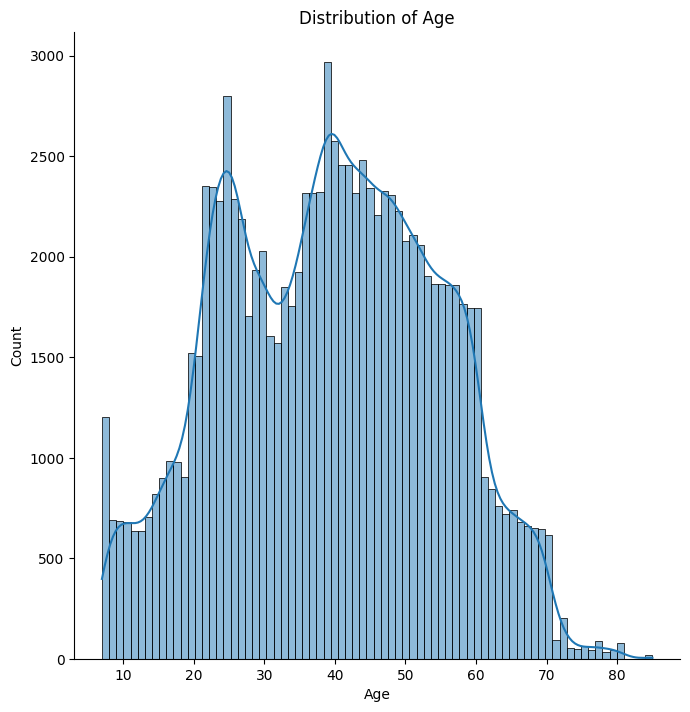

In [19]:
sns.displot(data = data['Age'], palette='mako', kde=True, height = 7)
plt.title('Distribution of Age')

There is not much childrens here. There is a noticeable increasing in count when we come to age 25. From age 58 we notice that the count come low. That means we are working in youth people in age between (25 - 60).

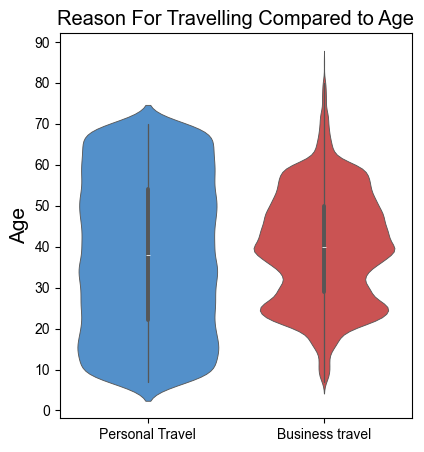

In [20]:
plt.figure(figsize=(10,5),dpi=100)


plt.subplot(1,2,1)

plt.style.use('bmh')
sns.set_style('ticks')



plt.title('Reason For Travelling Compared to Age')

sns.violinplot(x='Type of Travel',y='Age',hue='Type of Travel',data=data,palette=['#3F91DE','#DE3F3F'])


plt.yticks(np.arange(0,100,10))


plt.ylabel('Age',size=15)
plt.xlabel('')


plt.subplots_adjust(hspace = 0.3, wspace=0.2)

plt.show()

Number of passengers flying for personal reasons is consinstent at any age. Most passengers flying for business are between 25-60.

In [21]:
gender_satisfaction_count = data.groupby(["Gender", "satisfaction"]).size().reset_index(name="Count")

fig = px.pie(
    gender_satisfaction_count,
    values="Count",
    names="satisfaction",
    title="Satisfaction Distribution by Gender",
    color="satisfaction",
    #color_discrete_sequence=['#98F5FF', '#08306B'],  # Define custom colors
    color_discrete_sequence=['#98F5FF', '#193EB0'],  # Define custom colors
    facet_col="Gender",
)

fig.update_traces(textinfo='percent+label', pull=[0.03,0])

fig.show()

Overall, the data suggests a relatively balanced satisfaction distribution between genders, with a slightly higher proportion of satisfied individuals across both male and female groups.

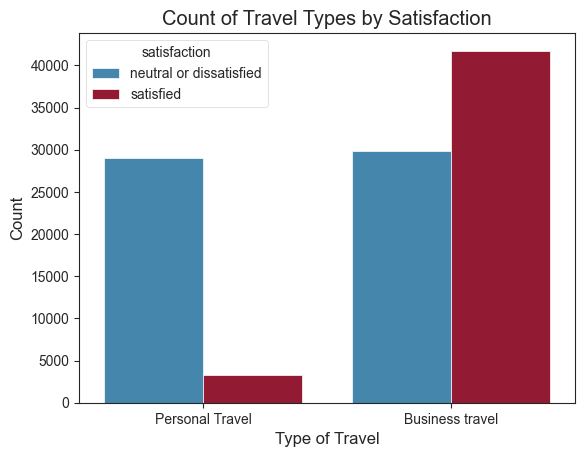

In [22]:
g = sns.countplot(x="Type of Travel", hue="satisfaction", data=data)
g.set_ylabel("Count")
g.set_title("Count of Travel Types by Satisfaction")
plt.show()

Business travel is generally satisfied with the flight but personal travel is generally neutral or dissatisfied with the flight.

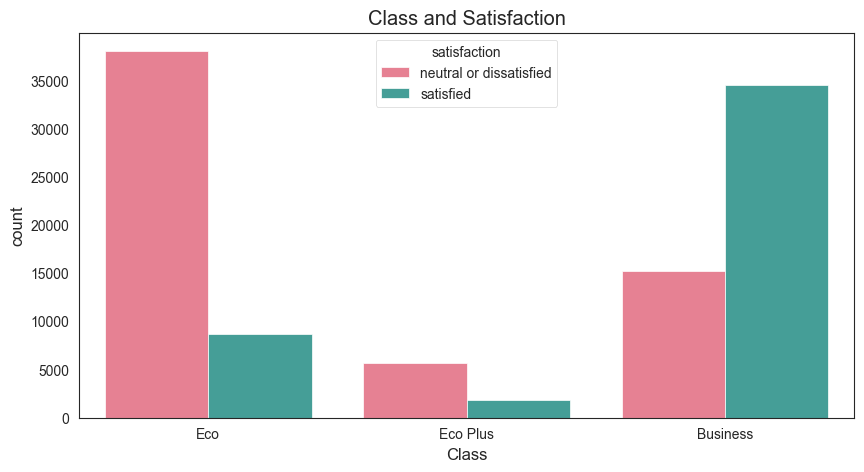

In [23]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(10, 5))  # Tek sütunlu bir subplot oluşturuldu

sns.countplot(x='Class', data=data, hue='satisfaction', order=['Eco', 'Eco Plus', 'Business'], palette='husl', ax=ax)
ax.set_title('Class and Satisfaction')

plt.subplots_adjust(hspace=0.6, wspace=0.4)
plt.show()

Economy and Economy Plus tend to have more neutral or dissatisfied customers than satisfied customers, whereas Business Class has more satisfied customers than dissatisfied customers. Notably, Economy Plus has the lowest count, therefore, there is an unequal distribution in the class of customers in the dataset

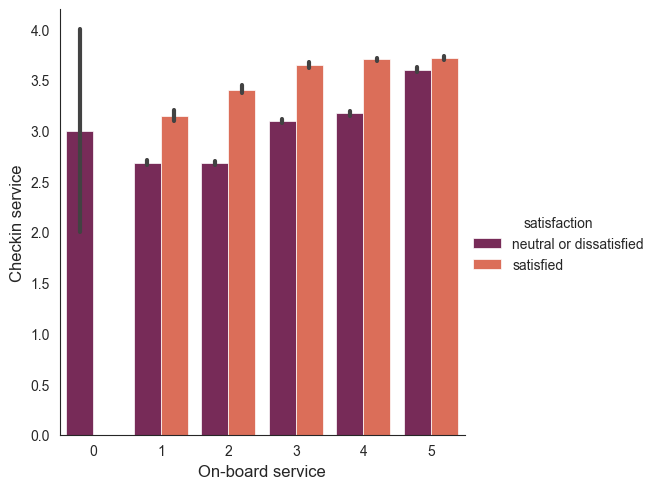

In [24]:
sns.catplot(x='On-board service',y='Checkin service',hue='satisfaction',data=data,kind='bar',palette='rocket')

As we can see while the rating increases in on-board service the checkin service increases and people will be satisfied

Text(0.5, 1.0, 'Ease of Online booking and Classes')

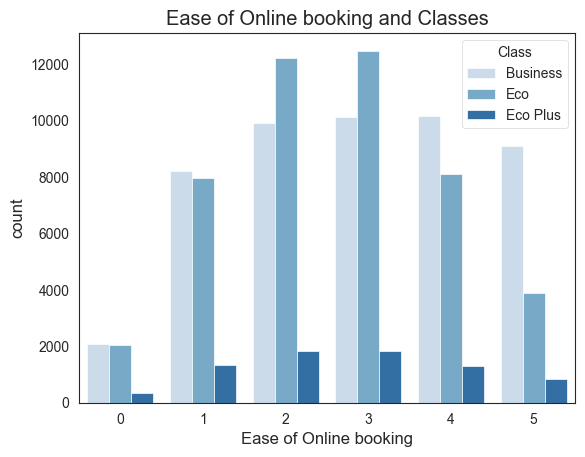

In [25]:
sns.countplot(data=data,x='Ease of Online booking',hue='Class',palette='Blues')
plt.title("Ease of Online booking and Classes")

As we can see it is easy to book online the ECO class and business
It is hard for ECO plus

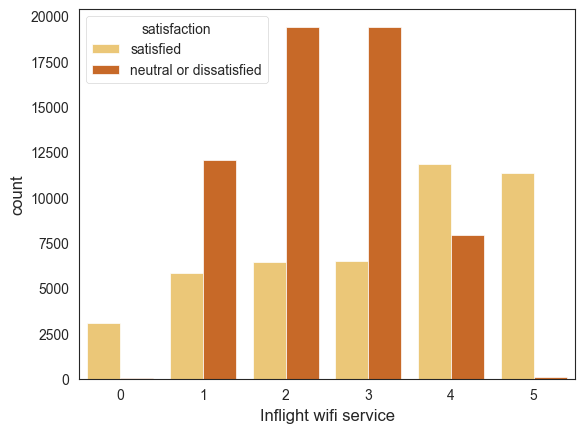

In [26]:
sns.countplot(x = 'Inflight wifi service', hue = 'satisfaction', palette = "YlOrBr", data = data)
plt.show()

Based on this chart, it's evident that nearly every traveler who rated the Wi-Fi service with a perfect score of 5 out of 5 points expressed satisfaction with the flight.

<Axes: xlabel='Arrival Delay in Minutes', ylabel='Departure Delay in Minutes'>

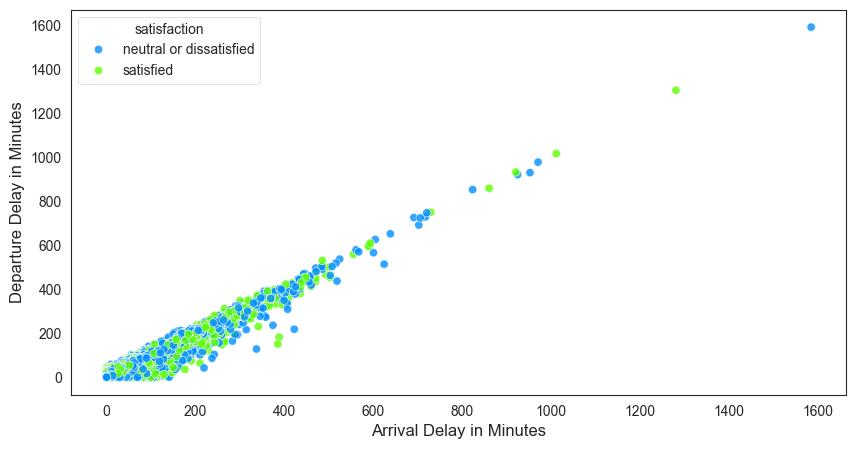

In [27]:
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=data,x='Arrival Delay in Minutes',y='Departure Delay in Minutes',hue='satisfaction',palette='gist_rainbow_r', alpha=0.8)

The connection between arrival and departure lateness seems to follow a linear pattern. Moreover, it's worth noting that one customer expressed satisfaction despite experiencing a 1300-minute delay

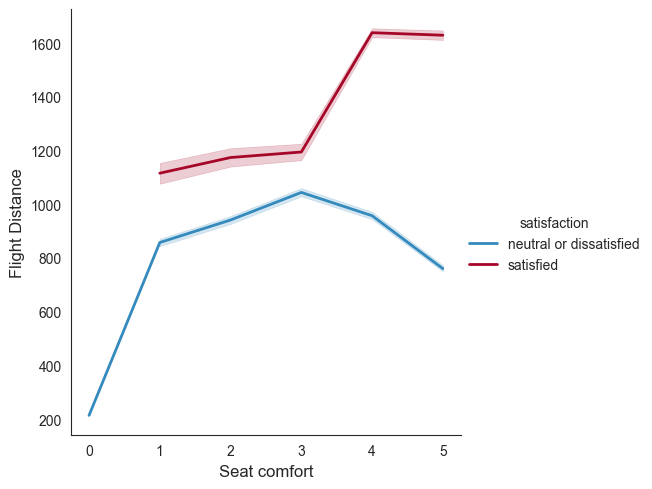

In [28]:
sns.relplot(data=data,x='Seat comfort',y='Flight Distance',hue='satisfaction',kind='line')

Satisfied people have more long-distance flight than the dissatisfied.

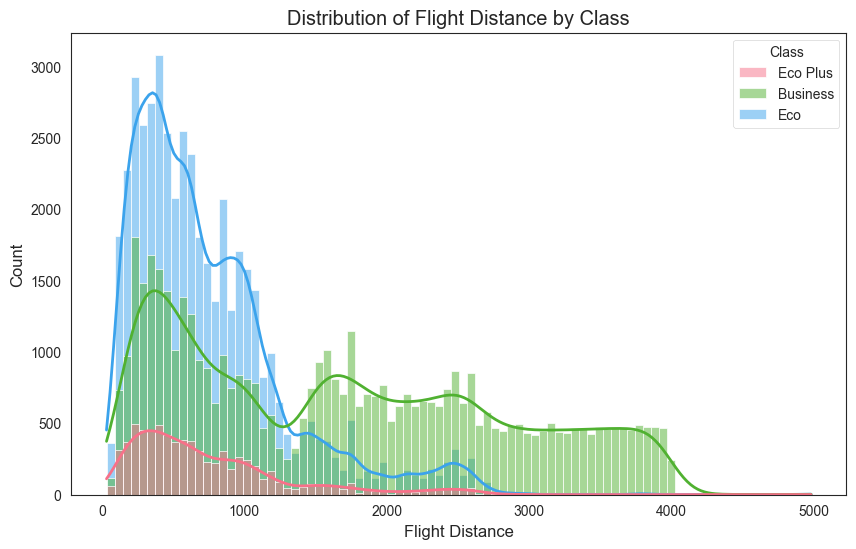

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6)) 

sns.histplot(x='Flight Distance', data=data, hue='Class', kde=True, palette='husl')
plt.title('Distribution of Flight Distance by Class') 

plt.show()

We can also see that as flight distance increases, more people take Business class than Economy or Economy Plus. However, for short distances, particularly those under 1000 miles, Economy class is by far the most popular choice. Economy Plus is consistently the least popular choice among the flight classes.

### Part 4. Data pre-processing

- a) Check whether there are any outliers?  Remove outliers (if there are any) in your data.
- b) How many columns include missing values?
- c) Explain your method to handle each of those missing value and explain Why you chose this methods?
- d) Handling missing values via appropriate approaches
- e) Perfrom all additional  pre-processing steps that you consider necessary.



In [30]:
def outlierThresholdsIQR(data, colName, q1=0.25, q3=0.75):
    Q1 = data[colName].quantile(q1)
    Q3 = data[colName].quantile(q3)
    IQR = Q3 - Q1
    upperBoundary = Q3 + 1.5 * IQR
    lowerBoundary = Q1 - 1.5 * IQR
    return lowerBoundary, upperBoundary

 calculates the lower and upper boundaries for detecting outliers using the Interquartile Range (IQR) method

In [31]:
def checkOutlierIQR(data):
    outlier_columns = [] 
    for colName in data.columns:
        if pd.api.types.is_numeric_dtype(data[colName]): 
            lowerBoundary, upperBoundary = outlierThresholdsIQR(data, colName)
            if data[(data[colName] > upperBoundary) | (data[colName] < lowerBoundary)].any(axis=1).astype(int).sum():
                outlier_columns.append(colName)  
    return outlier_columns


examines each numeric column in the dataset, calculates outlier thresholds using the IQR method, and identifies columns where outliers are present. It provides a convenient way to detect outliers across multiple columns in a dataset.

In [32]:
outlier_columns = checkOutlierIQR(data)
print("Column which has outliers:", outlier_columns)

Column which has outliers: ['Flight Distance', 'Checkin service', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


In [33]:
def removeOutlierIQR(data, colName):
    lowerBoundary, upperBoundary = outlierThresholdsIQR(data, colName)
    withoutOutliers = data[~((data[colName] < lowerBoundary) | (data[colName] > upperBoundary))]
    return withoutOutliers

provides a straightforward way to remove outliers from a specific column in a dataset using the IQR method. 

In [34]:
removeOutlierIQR(data, "Flight Distance").shape

(101613, 23)

I remove all the outleirs in the columns that has outliers

In [35]:
removeOutlierIQR(data, "Checkin service").shape

(91013, 23)

In [36]:
removeOutlierIQR(data, "Departure Delay in Minutes").shape

(89375, 23)

In [37]:
removeOutlierIQR(data, "Arrival Delay in Minutes").shape

(89950, 23)

In [38]:
dataWithoutOutliers=data.copy()

In [39]:
diaNumCols=data.select_dtypes(include=np.number).columns
for numFeature in diaNumCols:
    dataWithoutOutliers =  removeOutlierIQR(dataWithoutOutliers, numFeature)

a loop that iterates over each numeric column in the dataset, selects those columns, and then applies the 'removeOutlierIQR' function to remove outliers from each selected numeric column using the Interquartile Range (IQR) method.

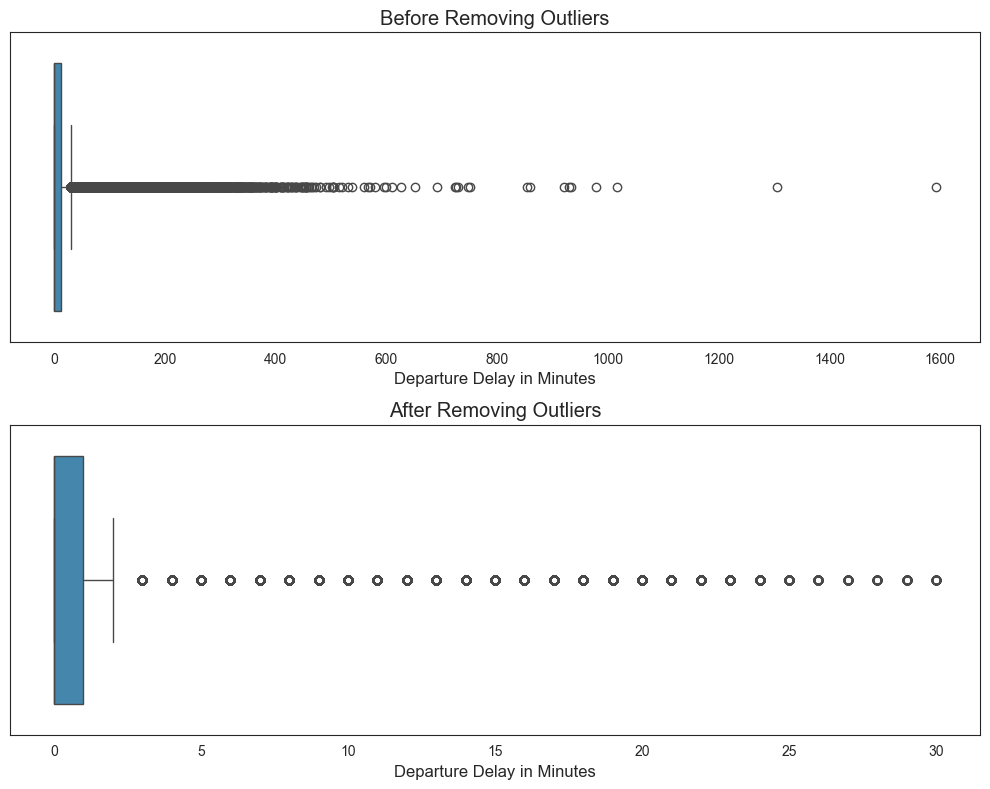

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

sns.boxplot(data=data, x='Departure Delay in Minutes', ax=axes[0])
axes[0].set_title('Before Removing Outliers') 
sns.boxplot(data=dataWithoutOutliers, x='Departure Delay in Minutes', ax=axes[1])
axes[1].set_title('After Removing Outliers')  

plt.tight_layout()

plt.show()

Text(0.5, 1.0, 'After Removing Outliers')

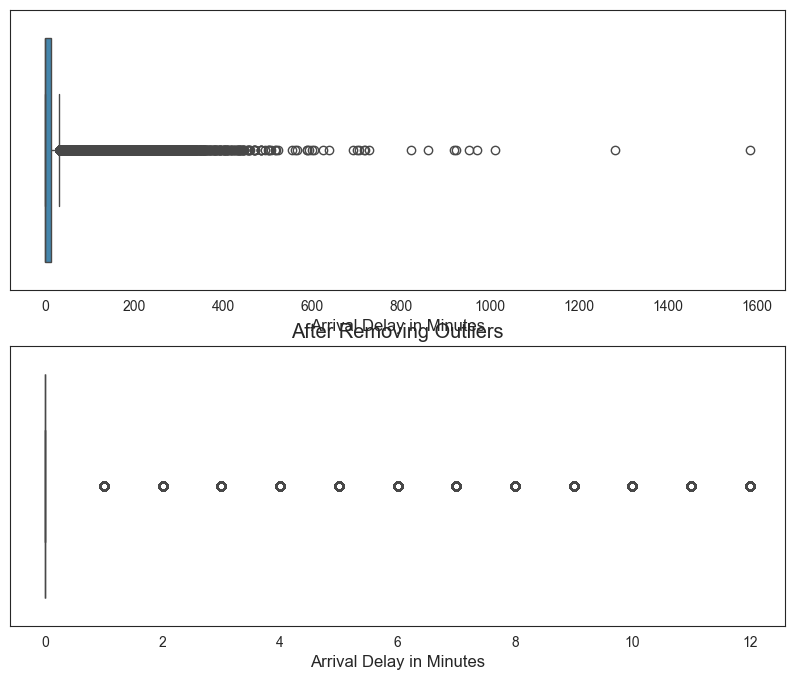

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
sns.boxplot(data=data, x='Arrival Delay in Minutes' ,ax=axes[0])  
plt.title('Before Removing Outliers') 

plt.subplot(2, 1, 2)  
sns.boxplot(data=dataWithoutOutliers, x='Arrival Delay in Minutes', ax=axes[1])  
plt.title('After Removing Outliers')  

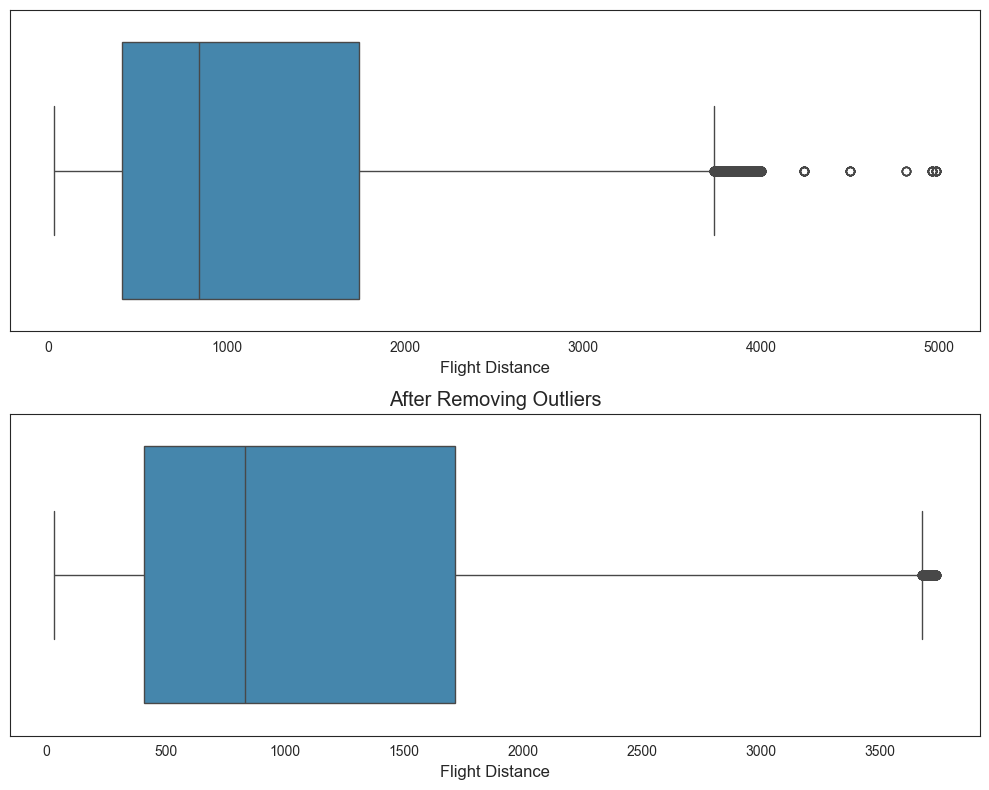

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
sns.boxplot(data=data, x='Flight Distance',ax=axes[0])  
plt.title('Before Removing Outliers') 

plt.subplot(2, 1, 2)  
sns.boxplot(data=dataWithoutOutliers, x='Flight Distance', ax=axes[1])  
plt.title('After Removing Outliers')  

plt.tight_layout() 
plt.show()

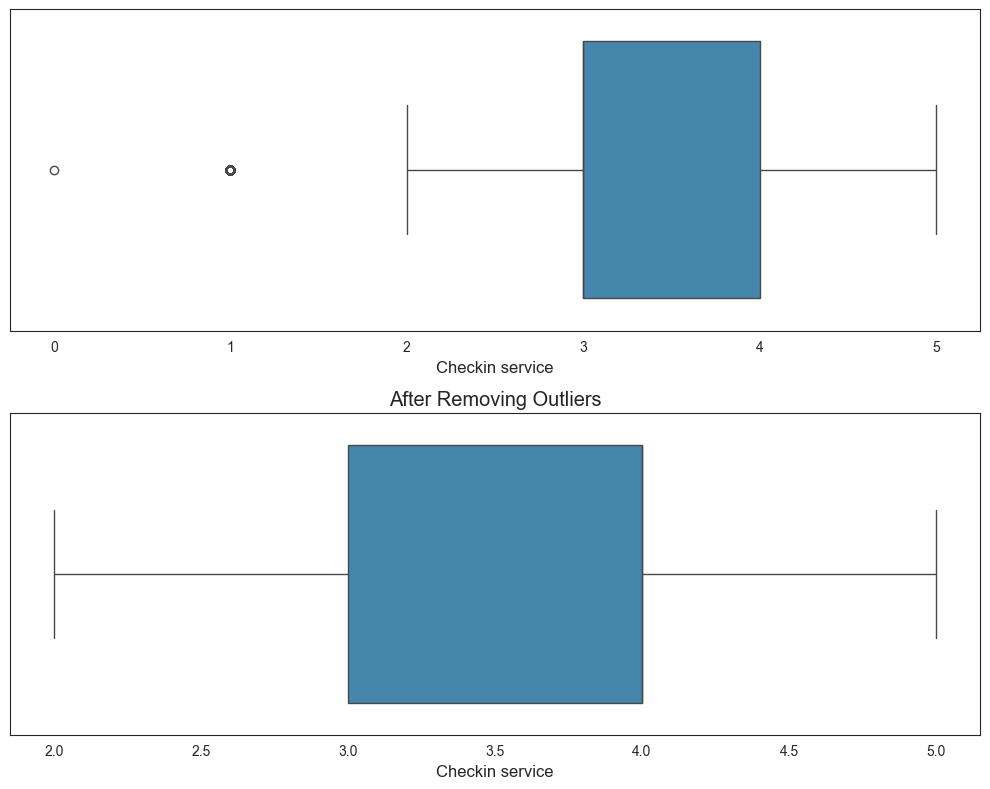

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
sns.boxplot(data=data, x='Checkin service',ax=axes[0])  
plt.title('Before Removing Outliers') 

plt.subplot(2, 1, 2)  
sns.boxplot(data=dataWithoutOutliers, x='Checkin service', ax=axes[1])  
plt.title('After Removing Outliers')  

plt.tight_layout() 
plt.show()

All columns has been cleaned from outliers which has outliers. As we see up, first I draw plot with outliers and then remove outliers.

In [44]:
data.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [45]:
sampleairlinewithInterpolation=data
missingPercentages = sampleairlinewithInterpolation.isna().sum().sort_values(
    ascending = False)/len(sampleairlinewithInterpolation)*100

# Filter: sort out the ones with zeroes
missingPercentages[missingPercentages != 0]

Arrival Delay in Minutes    0.298352
dtype: float64

In [46]:
sampleairlinewithInterpolation['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].interpolate(method ='linear', limit_direction ='forward')

In [47]:
missPercent = sampleairlinewithInterpolation.isna().sum().sort_values(
    ascending = False)/len(sampleairlinewithInterpolation)
missPercent[missPercent != 0]#checking the filling process

Series([], dtype: float64)

In [48]:
data.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

### Part 5. Feature engineering and description 

- a) Explain if you need to apply any kind of transformations and/or encoding and perform them. 
- b) Determine which features are the most valuable and whether you need to create a new feature?    
- c) Select (i.e., filter) or create features that make machine learning algorithms work.
- d) Apply dimensionality reduction i.e. PCA to your data.
- e) Perfrom all additional feature engineering steps that you consider necessary.

In [49]:
nDuplicates = data.duplicated().sum()
print(f"You seem to have {nDuplicates} duplicates in your dataset.")

You seem to have 0 duplicates in your dataset.


In [50]:
data.isnull().values.any()

False

In [51]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in data.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    data[col] = lencoders[col].fit_transform(data[col])

I have categorical features so I made label encoding to convert categorical features into numerical features

In [52]:
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


<Axes: >

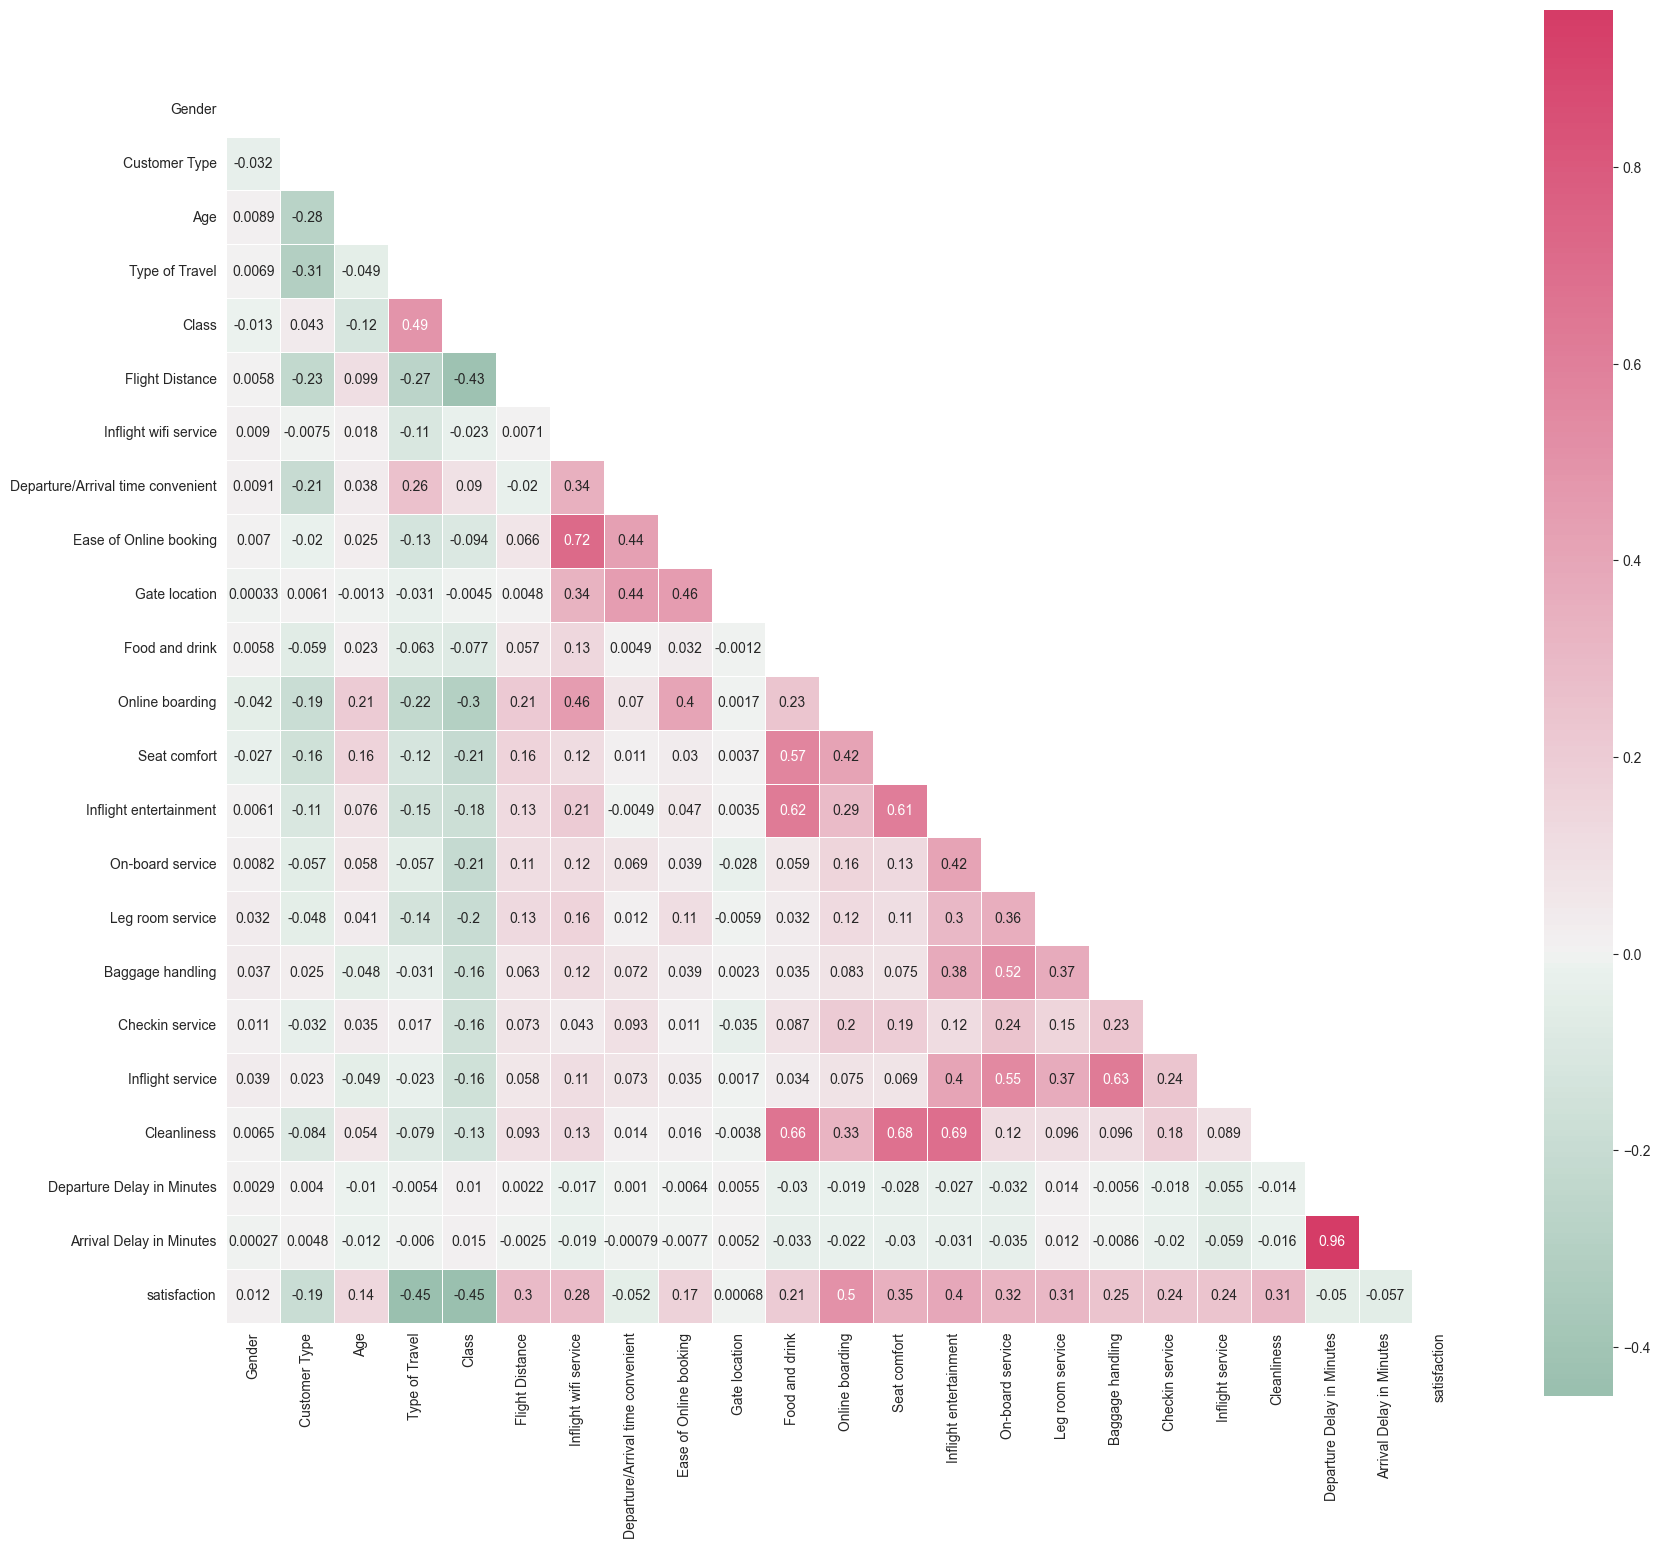

In [53]:
import seaborn as sns
import pandas as pd
import numpy as np
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(150, 1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

"Ease_of_Online_booking" is highly correlated with "Inflight_wifi_service". Also "Inflight_service" is highly correlated with "Baggage_handling". But no pair is having corr. coefficient exactly equal to 1. So there is no perfect multicollinearity. Hence we are not discarding any variable.

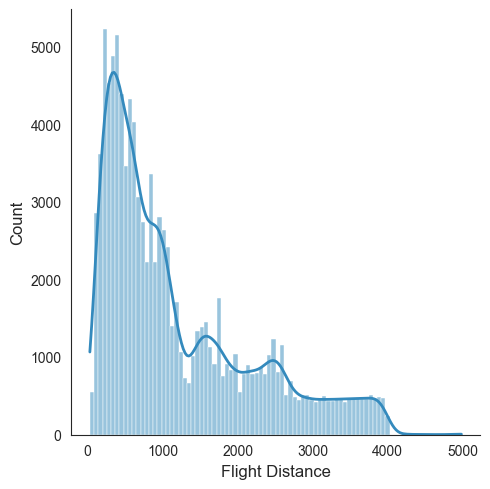

In [54]:
sns.displot(data=data, x="Flight Distance", kde=True)
plt.show()

 Flight distance is highly skewed so I use log transformer to overcome skewed.

In [55]:
def logTransform(data, xFeature):
    return (np.log10(1+ data[[xFeature]]))

Using logTransform function

In [56]:
logTransFlightDistance=logTransform(data, 'Flight Distance')
data['logTransFlightDistance'] = logTransFlightDistance
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,logTransFlightDistance
0,1,0,13,1,2,460,3,4,3,1,...,4,3,4,4,5,5,25,18.0,0,2.663701
1,1,1,25,0,0,235,3,2,3,3,...,1,5,3,1,4,1,1,6.0,0,2.372912
2,0,0,26,0,0,1142,2,2,2,2,...,4,3,4,4,4,5,0,0.0,1,3.058046
3,0,0,25,0,0,562,2,5,5,5,...,2,5,3,1,4,2,11,9.0,0,2.750508
4,1,0,61,0,0,214,3,3,3,3,...,3,4,4,3,3,3,0,0.0,1,2.332438


<Axes: xlabel='logTransFlightDistance', ylabel='Count'>

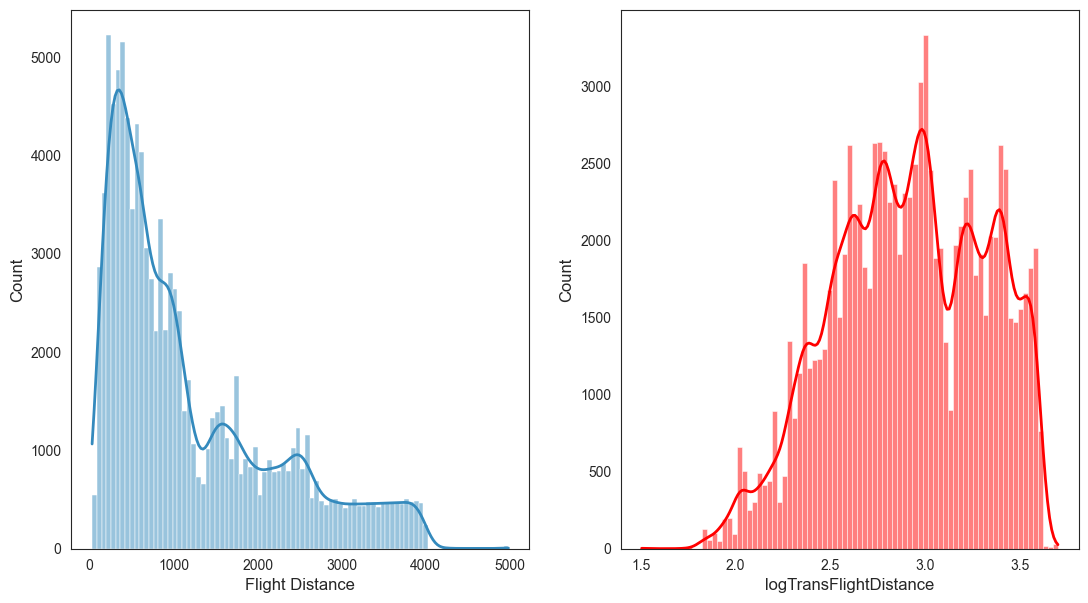

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(13, 7))

sns.histplot(data=data, x='Flight Distance', kde=True, ax = ax[0])
sns.histplot(data=data, x='logTransFlightDistance', kde=True, color ="red", ax = ax[1])

We can see that the skewness of the distributions are maintained

In [58]:
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(data)
modified_data = pd.DataFrame(r_scaler.transform(data), columns=data.columns)
modified_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,logTransFlightDistance
0,1.0,0.0,0.076923,1.0,1.0,0.086632,0.6,0.8,0.6,0.2,...,0.8,0.6,0.75,0.8,1.0,1.0,0.015704,0.011364,0.0,0.528433
1,1.0,1.0,0.230769,0.0,0.0,0.041195,0.6,0.4,0.6,0.6,...,0.2,1.0,0.50,0.2,0.8,0.2,0.000628,0.003788,0.0,0.395800
2,0.0,0.0,0.243590,0.0,0.0,0.224354,0.4,0.4,0.4,0.4,...,0.8,0.6,0.75,0.8,0.8,1.0,0.000000,0.000000,1.0,0.708300
3,0.0,0.0,0.230769,0.0,0.0,0.107229,0.4,1.0,1.0,1.0,...,0.4,1.0,0.50,0.2,0.8,0.4,0.006910,0.005682,0.0,0.568027
4,1.0,0.0,0.692308,0.0,0.0,0.036955,0.6,0.6,0.6,0.6,...,0.6,0.8,0.75,0.6,0.6,0.6,0.000000,0.000000,1.0,0.377339


I used MinMaxScaler to equalize the value ranges between different features or to compress them into a specific range.

In [59]:
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='satisfaction']
y = modified_data[['satisfaction']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Customer Type', 'Type of Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service'],
      dtype='object')


These are top 10 features impacting on passenger satisfaction.

In [60]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca.fit(modified_data)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_[:2].sum())

[0.23258042 0.12516482 0.11935981 0.08573184]
0.35774523644948086


In [61]:
pca.components_

array([[-1.42521491e-02,  5.85199759e-02, -4.55248432e-02,
         4.16615890e-01,  2.73321638e-01, -1.17560689e-01,
        -1.38054729e-01,  1.96576302e-02, -1.09468481e-01,
        -1.74381305e-02, -1.39315076e-01, -2.34443397e-01,
        -1.94588574e-01, -2.27579400e-01, -1.55077736e-01,
        -1.52991098e-01, -1.50789460e-01, -9.95391469e-02,
        -1.16015142e-01, -1.75247889e-01,  1.27219565e-03,
         1.49802327e-03, -6.35359034e-01, -9.21200314e-02],
       [-5.63296672e-01,  4.39758862e-01, -4.86148677e-02,
        -5.30976817e-01, -1.07555461e-01,  3.76731817e-03,
        -1.02582548e-01, -2.56422143e-01, -7.86885288e-02,
        -5.80686054e-02, -1.04336352e-01, -7.20329456e-02,
        -1.08384809e-01, -1.37459755e-01, -1.02690114e-01,
        -6.27416185e-02, -1.17207878e-01, -8.48222498e-02,
        -9.28500357e-02, -1.21589730e-01,  7.79876634e-04,
         9.81641841e-04, -4.52648493e-02, -5.41613197e-04],
       [ 8.21202853e-01,  2.82247697e-01, -3.42313776e

In [62]:
pca.explained_variance_

array([0.48137944, 0.2590578 , 0.24704299, 0.17744205])

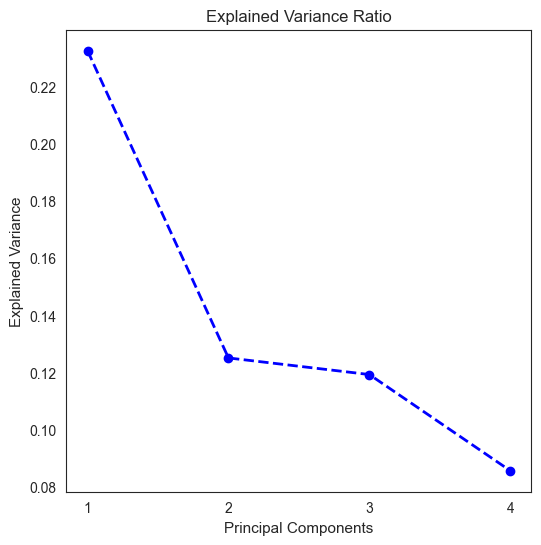

In [63]:
# Visual for each component’s explained variance
fig, ax = plt.subplots(figsize=(6,6))

ax.plot(pca.explained_variance_ratio_,'bo--',linewidth=2)
ax.set_xlabel('Principal Components', fontsize = 11)
ax.set_ylabel('Explained Variance', fontsize = 11)
ax.set_title('Explained Variance Ratio', fontsize = 12)
n = len(pca.explained_variance_ratio_)
plt.xticks(np.arange(n), np.arange(1, n+1));

First component has the highest explained variance ratio, approximately 0.22, meaning it captures about 22% of the total variance in the dataset. It is the most significant component in terms of explaining the variability of the data.The explained variance ratio decreases for the following components, indicating they contribute less to explaining the data’s variability. The second component has a lower explained variance ratio compared to the first, and this trend continues for the third and fourth components.

### Part 6. Choose Machine Learning Algorithms & Explain 
- a) Choose which type of machine learning (ML) algorithm are you planning to apply (Regression, Classification or Clustering). Select at least 3 algorithms in order to compare and explain.
- b) Discuss advantages and disadvantages of selected approaches. 
- c) Select appropriate evaluation methods that you will use in your project and explain them in detail by giving proper formulation



Logistic Regression:İki sınıf arasında ayrım yapmak için kullanılan bir sınıflandırma algoritmasıdır.
Çıkış değeri, bir olasılık değeri olup, genellikle 0 ile 1 arasında değişir.
Avantajları:
Basit ve hızlıdır.
Kolay yorumlanabilir.
Overfitting’e karşı dayanıklıdır.
Dezavantajlar: 
Lineer olmayan ilişkileri iyi modelleyemez.
Daha karmaşık karar sınırları gerektiğinde yetersiz kalabilir.
Decision Tree: Decision Tree, verileri ağaç yapısı kullanarak sınıflandıran bir algoritmadır.
Her düğüm, veri setini bir özelliğe göre böler ve yaprak düğümler sınıf etiketlerini temsil eder.
Avantajlar:
Kolay anlaşılabilir ve görselleştirilebilir.
Kategorik ve sayısal verilerle çalışabilir.
Non-lineer ilişkileri modelleyebilir.
Dezavantajlar: 
Lineer olmayan ilişkileri iyi modelleyemez.
Daha karmaşık karar sınırları gerektiğinde yetersiz kalabilir.
KNN: KNN, yeni bir veri noktasını sınıflandırmak için en yakın k tane komşusuna bakar.
KNN, eğitim süreci gerektirmez, tüm eğitim verisini bellekte saklar ve tahminleri bu veriler üzerinde yapar.
Avantajlar: Basit ve sezgiseldir.
Non-lineer karar sınırları öğrenebilir.
Eğitim süresi gerektirmez.
Dezavantajlar: 
Hesaplama maliyeti yüksektir (büyük veri setlerinde).
Bellek kullanımı fazladır.
Gürültüye ve ölçeklemeye duyarlıdır.

### Part 7. Cross-validation, hyperparameter tuning
- a) Implement your selected algorithm.
- b) Which hyperparameters need to be tuned? Explain
- c) Use cross-validation for each algorithm
- d) Find the best parameters for each approach.


In [64]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [65]:
print(X.columns[selector.get_support(indices=True)])

# Eğitim ve test veri setlerine bölün
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

Index(['Customer Type', 'Type of Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service'],
      dtype='object')


In [66]:
model = LogisticRegression()
model.fit(X_train, y_train.values.ravel())

LogisticRegression()

In [67]:
y_pred = model.predict(X_test)

In [68]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8654540204994947
Confusion Matrix:
 [[10453  1260]
 [ 1536  7532]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.89      0.88     11713
         1.0       0.86      0.83      0.84      9068

    accuracy                           0.87     20781
   macro avg       0.86      0.86      0.86     20781
weighted avg       0.87      0.87      0.87     20781



In [69]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [70]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [71]:
y_pred = model.predict(X_test)

In [72]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.924353977190703
Confusion Matrix:
 [[10907   806]
 [  766  8302]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.93      0.93     11713
         1.0       0.91      0.92      0.91      9068

    accuracy                           0.92     20781
   macro avg       0.92      0.92      0.92     20781
weighted avg       0.92      0.92      0.92     20781



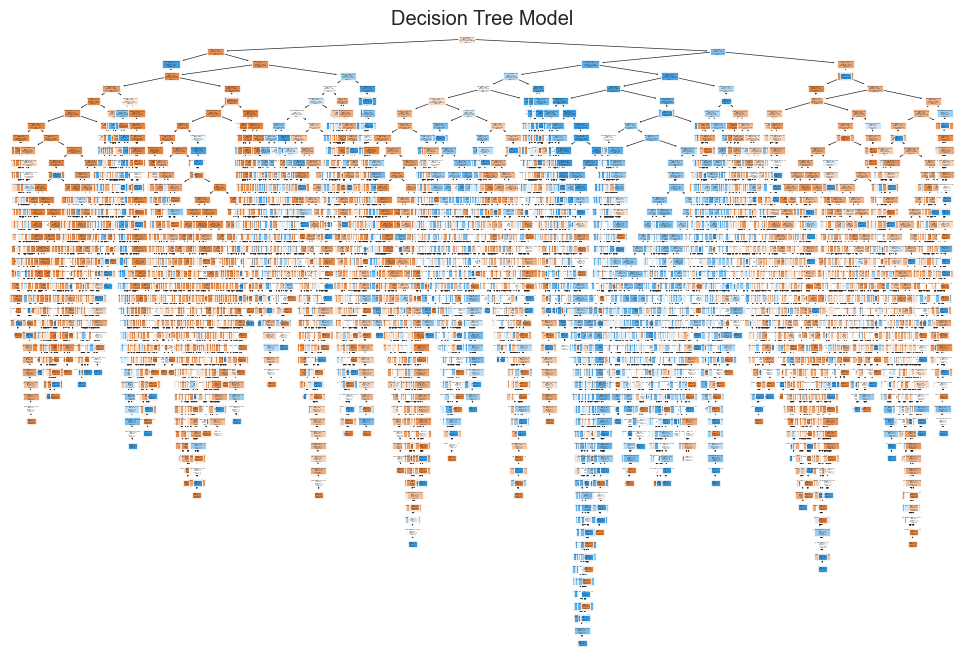

In [73]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Define your trained model here
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Visualize the tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=["Customer Type", "Type of Travel", "Class", "Flight Distance",
                                             "Inflight wifi service", "Online boarding", "Seat comfort",
                                             "Inflight entertainment", "On-board service", "Leg room service"],
          class_names=["0", "1", "2"])
plt.title("Decision Tree Model")
plt.show()


In [74]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train.values.ravel())

KNeighborsClassifier()

In [75]:
y_pred = model.predict(X_test)


In [76]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9355180212694288
Confusion Matrix:
 [[11250   463]
 [  877  8191]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.96      0.94     11713
         1.0       0.95      0.90      0.92      9068

    accuracy                           0.94     20781
   macro avg       0.94      0.93      0.93     20781
weighted avg       0.94      0.94      0.94     20781



In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cv_scores = cross_val_score(model, X_train, y_train.values.ravel(), cv=5)

# Cross-validation sonuçlarını yazdırın
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Modeli eğitim verisiyle eğitin
model.fit(X_train, y_train.values.ravel())

# Test verisi üzerinde tahmin yapın
y_pred = model.predict(X_test)

# Modelin performansını değerlendirin
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Cross-Validation Scores: [0.93184962 0.92914286 0.93070677 0.93220645 0.93425168]
Mean Accuracy: 0.9316314761880639
Accuracy: 0.9355180212694288
Confusion Matrix:
 [[11250   463]
 [  877  8191]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.96      0.94     11713
         1.0       0.95      0.90      0.92      9068

    accuracy                           0.94     20781
   macro avg       0.94      0.93      0.93     20781
weighted avg       0.94      0.94      0.94     20781



In [78]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cv_scores = cross_val_score(model, X_train, y_train.values.ravel(), cv=5)

# Cross-validation sonuçlarını yazdırın
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Modeli eğitim verisiyle eğitin
model.fit(X_train, y_train.values.ravel())

# Test verisi üzerinde tahmin yapın
y_pred = model.predict(X_test)

# Modelin performansını değerlendirin
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Cross-Validation Scores: [0.93184962 0.92914286 0.93070677 0.93220645 0.93425168]
Mean Accuracy: 0.9316314761880639
Accuracy: 0.9355180212694288
Confusion Matrix:
 [[11250   463]
 [  877  8191]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.96      0.94     11713
         1.0       0.95      0.90      0.92      9068

    accuracy                           0.94     20781
   macro avg       0.94      0.93      0.93     20781
weighted avg       0.94      0.94      0.94     20781



In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Cross-validation yapın ve doğruluk skorunu hesaplayın
cv_scores = cross_val_score(model, X_train, y_train.values.ravel(), cv=5)

# Cross-validation sonuçlarını yazdırın
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Modeli eğitim verisiyle eğitin
model.fit(X_train, y_train.values.ravel())

# Test verisi üzerinde tahmin yapın
y_pred = model.predict(X_test)

# Modelin performansını değerlendirin
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Cross-Validation Scores: [0.93184962 0.92914286 0.93070677 0.93220645 0.93425168]
Mean Accuracy: 0.9316314761880639
Accuracy: 0.9355180212694288
Confusion Matrix:
 [[11250   463]
 [  877  8191]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.96      0.94     11713
         1.0       0.95      0.90      0.92      9068

    accuracy                           0.94     20781
   macro avg       0.94      0.93      0.93     20781
weighted avg       0.94      0.94      0.94     20781



In [80]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.stats import uniform



# Hiperparametre aralığını tanımlayın
param_dist_lr = {
    'C': uniform(loc=0.001, scale=10),  # C'yi sürekli bir aralıktan seçiyoruz
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# RandomizedSearchCV kullanarak en iyi hiperparametreleri bulun
random_search_lr = RandomizedSearchCV(LogisticRegression(), param_distributions=param_dist_lr, n_iter=100, cv=5, scoring='accuracy', random_state=42)
random_search_lr.fit(X_train, y_train.values.ravel())

# En iyi hiperparametreleri yazdırın
print("Best Hyperparameters for Logistic Regression:", random_search_lr.best_params_)

# En iyi modeli kullanarak tahmin yapın
best_model_lr = random_search_lr.best_estimator_
y_pred_lr = best_model_lr.predict(X_test)

# Modelin performansını değerlendirin
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Best Hyperparameters for Logistic Regression: {'C': 0.34488521115218396, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.8653577787401954
Confusion Matrix:
 [[10455  1258]
 [ 1540  7528]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.89      0.88     11713
         1.0       0.86      0.83      0.84      9068

    accuracy                           0.87     20781
   macro avg       0.86      0.86      0.86     20781
weighted avg       0.87      0.87      0.87     20781



In [81]:
param_dist_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# RandomizedSearchCV kullanarak en iyi hiperparametreleri bulun
random_search_dt = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=param_dist_dt, n_iter=90, cv=5, scoring='accuracy', random_state=42)
random_search_dt.fit(X_train, y_train.values.ravel())

# En iyi hiperparametreleri yazdırın
print("Best Hyperparameters for Decision Tree:", random_search_dt.best_params_)

# En iyi modeli kullanarak tahmin yapın
best_model_dt = random_search_dt.best_estimator_
y_pred_dt = best_model_dt.predict(X_test)

# Modelin performansını değerlendirin
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Best Hyperparameters for Decision Tree: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10, 'criterion': 'gini'}
Accuracy: 0.9389827246042057
Confusion Matrix:
 [[11283   430]
 [  838  8230]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.96      0.95     11713
         1.0       0.95      0.91      0.93      9068

    accuracy                           0.94     20781
   macro avg       0.94      0.94      0.94     20781
weighted avg       0.94      0.94      0.94     20781



In [82]:
param_dist_knn = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# RandomizedSearchCV kullanarak en iyi hiperparametreleri bulun
random_search_knn = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_dist_knn, n_iter=100, cv=5, scoring='accuracy', random_state=42)
random_search_knn.fit(X_train, y_train.values.ravel())

# En iyi hiperparametreleri yazdırın
print("Best Hyperparameters for KNN:", random_search_knn.best_params_)

# En iyi modeli kullanarak tahmin yapın
best_model_knn = random_search_knn.best_estimator_
y_pred_knn = best_model_knn.predict(X_test)

# Modelin performansını değerlendirin
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

Best Hyperparameters for KNN: {'weights': 'uniform', 'p': 1, 'n_neighbors': 15, 'algorithm': 'auto'}
Accuracy: 0.9366248015013714
Confusion Matrix:
 [[11304   409]
 [  908  8160]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.97      0.94     11713
         1.0       0.95      0.90      0.93      9068

    accuracy                           0.94     20781
   macro avg       0.94      0.93      0.94     20781
weighted avg       0.94      0.94      0.94     20781



### Part 8. Model evaluation  
- a) Show all your evaluation results and explain.
- b) Which algorithm performs the best? Can you explain why?



### Analysis and Explanation

- **Accuracy**: Decision Tree has the highest accuracy (0.939), followed by KNN (0.937) and Logistic Regression (0.865).
- **Confusion Matrix and Classification Report**: Decision Tree shows better performance in terms of precision, recall, and F1-score for both classes compared to the other algorithms.

### Reasons for the Performance

1. **Decision Tree**:
 - **Flexibility**: Decision Trees are highly flexible and can model complex relationships in the data, which might explain their higher accuracy and better classification metrics.
 - **Hyperparameters**: The tuned hyperparameters (e.g., `max_depth`, `min_samples_split`, `min_samples_leaf`) likely contributed to the model’s ability to generalize well on the test set.

2. **K-Nearest Neighbors (KNN)**:
 - **Simplicity**: KNN is a simple and effective algorithm, especially with hyperparameters (`n_neighbors`, `weights`, `p`) optimized for this problem. However, it might be slightly less flexible than a well-tuned Decision Tree.
 - **Distance Metric**: The choice of `p=1` (Manhattan distance) and `n_neighbors=15` likely contributed to a robust performance.

3. **Logistic Regression**:
 - **Linear Assumptions**: Logistic Regression is a linear model and might not capture the complex non-linear relationships in the data as effectively as Decision Trees or KNN.
 - **Hyperparameters**: Even with the optimized hyperparameters, the linear nature of Logistic Regression limits its performance on more complex datasets.



# Part 9. Validation and learning curves
- a) Plot validation & learning curves

# Logistic Regression Learning Curve (Öğrenme Eğrisi) & Logistic Regression Validation Curve (Doğrulama Eğrisi)


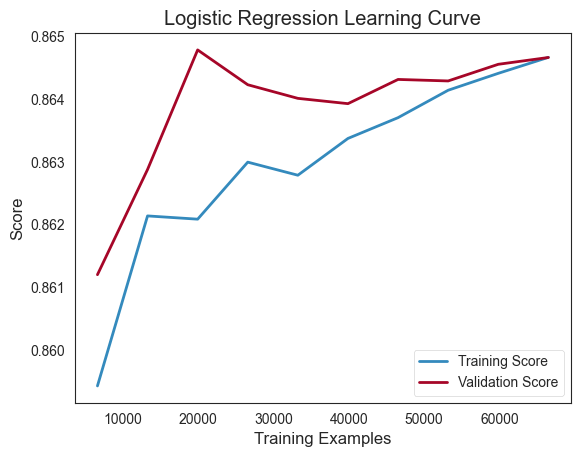

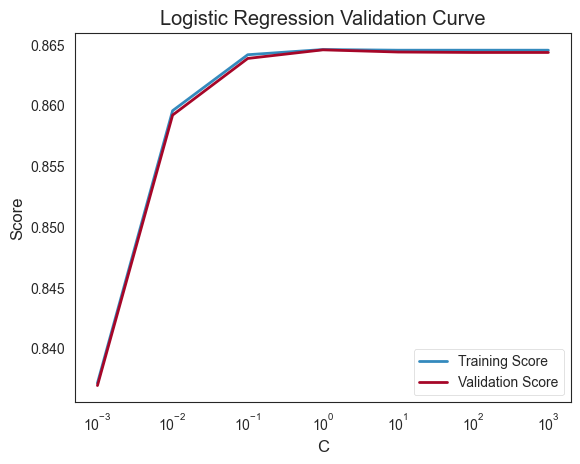

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.linear_model import LogisticRegression

# En iyi hiperparametrelerle bir Logistic Regression modeli oluşturun
best_model_lr = LogisticRegression(C=0.34488521115218396, penalty='l2', solver='liblinear')

# Learning Curve oluşturun
train_sizes, train_scores, valid_scores = learning_curve(best_model_lr, X_train, y_train.values.ravel(), train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Learning Curve'u çizin
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(valid_scores, axis=1), label='Validation Score')
plt.title('Logistic Regression Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

# Validation Curve oluşturun
param_range = np.logspace(-3, 3, 7)
train_scores, valid_scores = validation_curve(best_model_lr, X_train, y_train.values.ravel(), param_name='C', param_range=param_range, cv=5)

# Validation Curve'u çizin
plt.figure()
plt.semilogx(param_range, np.mean(train_scores, axis=1), label='Training Score')
plt.semilogx(param_range, np.mean(valid_scores, axis=1), label='Validation Score')
plt.title('Logistic Regression Validation Curve')
plt.xlabel('C')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()




### 1. Grafik: Logistic Regression Learning Curve (Öğrenme Eğrisi)
Bu grafik, eğitim örneklerinin sayısına göre eğitim ve doğrulama skorlarını göstermektedir.
Eğitim Skoru (Mavi Çizgi): Eğitim skoru başlangıçta düşük, ancak eğitim örnekleri arttıkça artış gösteriyor ve belirli bir noktadan sonra stabil hale geliyor.
Doğrulama Skoru (Kırmızı Çizgi):Doğrulama skoru başlangıçta eğitim skorundan daha yüksek, ancak daha sonra eğitim skoru doğrulama skoruna yaklaşıyor ve ikisi de benzer seviyelerde stabil hale geliyor.
Bu grafik, modelin overfitting yapmadığını ve eğitim örneklerinin sayısının artmasıyla birlikte eğitim ve doğrulama skorlarının iyileştiğini gösteriyor. 
Eğitim ve doğrulama skorlarının birbirine yakın olması, modelin iyi bir genelleme yeteneğine sahip olduğunu gösterir.

### 2. Grafik: Logistic Regression Validation Curve (Doğrulama Eğrisi)
Bu grafik, lojistik regresyon modelinde düzenleme parametresi \(C\)'nin değişimine göre eğitim ve doğrulama skorlarını göstermektedir.
Eğitim Skoru (Mavi Çizgi):C değeri küçükken (daha fazla düzenleme), eğitim skoru düşük. C değeri arttıkça (daha az düzenleme), eğitim skoru hızla artıyor ve sonra stabil hale geliyor.
Doğrulama Skoru (Kırmızı Çizgi):Doğrulama skoru, C değeri küçükken düşük, ancak C değeri arttıkça hızla artıyor ve eğitim skoruna yakın bir seviyede stabil hale geliyor.
Bu grafik, C parametresinin model performansı üzerindeki etkisini gösterir. Küçük C değerleri, modelin aşırı düzenleme yapmasına neden olurken, büyük C değerleri daha az düzenleme yapar ve modelin eğitim verisine daha iyi uyum sağlamasına olanak tanır.
Ancak, çok büyük C değerleri overfitting'e neden olabilir, bu yüzden ideal C değeri, eğitim ve doğrulama skorlarının dengeli olduğu yerdedir.

### Genel Değerlendirme:
- İlk grafik, eğitim örneklerinin sayısının artmasının modelin performansını nasıl iyileştirdiğini gösterir.
- İkinci grafik, düzenleme parametresi C'nin doğru seçilmesinin model performansı üzerindeki kritik etkisini vurgular.

Her iki grafik de birlikte incelendiğinde, lojistik regresyon modelinin hem eğitim veri setine hem de parametre seçimlerine karşı duyarlılığını anlamamıza yardımcı olur. Bu, modelin optimize edilmesinde önemli bir rol oynar.


# Decision Tree Learning Curve (Öğrenme Eğrisi) & Decision Tree Validation Curve (Doğrulama Eğrisi)


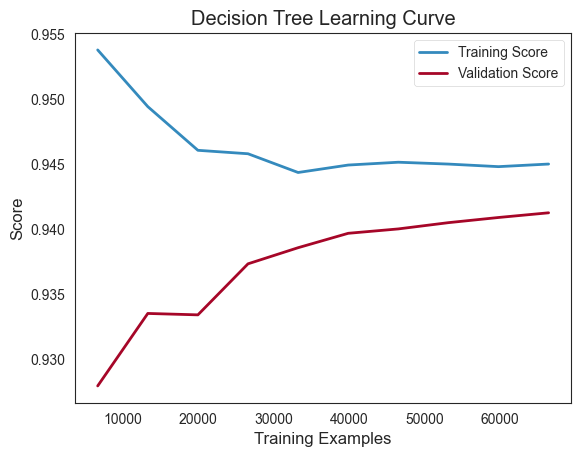

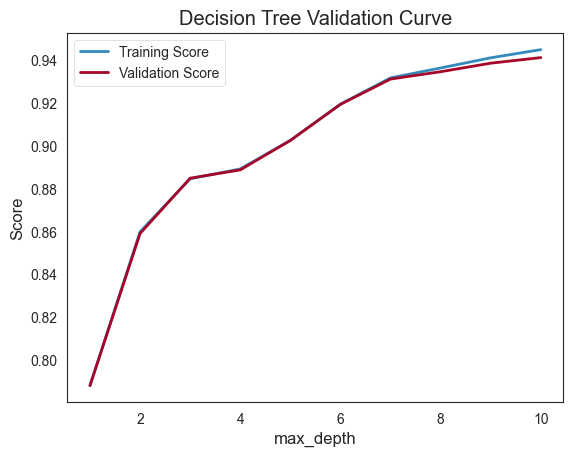

In [84]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# En iyi hiperparametrelerle bir Decision Tree modeli oluşturun
best_model_dt = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=2, max_depth=10, criterion='gini')

# Learning Curve oluşturun
train_sizes, train_scores, valid_scores = learning_curve(best_model_dt, X_train, y_train.values.ravel(), train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Learning Curve'u çizin
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(valid_scores, axis=1), label='Validation Score')
plt.title('Decision Tree Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

# Validation Curve oluşturun
param_range = range(1, 11)
train_scores, valid_scores = validation_curve(best_model_dt, X_train, y_train.values.ravel(), param_name='max_depth', param_range=param_range, cv=5)

# Validation Curve'u çizin
plt.figure()
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(param_range, np.mean(valid_scores, axis=1), label='Validation Score')
plt.title('Decision Tree Validation Curve')
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()




### 1. Grafik: Decision Tree Learning Curve (Öğrenme Eğrisi)
Bu grafik, eğitim örneklerinin sayısına göre eğitim ve doğrulama skorlarını göstermektedir.
Eğitim Skoru (Mavi Çizgi): Eğitim skoru başlangıçta oldukça yüksek, ancak eğitim örnekleri arttıkça bir miktar düşüş göstermekte ve daha sonra stabil hale gelmektedir. 
Bu durum, karar ağaçlarının genellikle eğitim verisine çok iyi uyum sağlamasından kaynaklanır.
Doğrulama Skoru (Kırmızı Çizgi): Doğrulama skoru başlangıçta düşük, ancak eğitim örnekleri arttıkça artış göstermekte ve daha sonra stabil hale gelmektedir.
Bu grafik, modelin overfitting yapmaya meyilli olduğunu ve eğitim örnekleri arttıkça doğrulama skorunun iyileştiğini gösterir. Eğitim ve doğrulama skorları arasındaki fark, modelin overfitting potansiyelini işaret eder.

### 2. Grafik: Decision Tree Validation Curve (Doğrulama Eğrisi)
Bu grafik, karar ağacı modelindeki maksimum derinlik (max_depth) parametresinin değişimine göre eğitim ve doğrulama skorlarını göstermektedir.
Eğitim Skoru (Mavi Çizgi): Maksimum derinlik az olduğunda eğitim skoru daha düşük, ancak derinlik arttıkça eğitim skoru artıyor ve en yüksek değere ulaşıyor.
Doğrulama Skoru (Kırmızı Çizgi): Doğrulama skoru başlangıçta düşük, ancak maksimum derinlik arttıkça hızla artıyor ve eğitim skoruna yaklaşıyor.
Bu grafik, maksimum derinlik parametresinin model performansı üzerindeki etkisini gösterir. Çok düşük derinlikler underfitting'e (eksik öğrenme) neden olurken, çok yüksek derinlikler overfitting'e (aşırı öğrenme) yol açabilir. Eğitim ve doğrulama skorlarının birbirine yaklaştığı yerler, modelin optimal performansa ulaştığı derinlik aralıklarını gösterir.

### Genel Değerlendirme:
- İlk grafik, eğitim örneklerinin sayısının artmasının modelin doğrulama performansını iyileştirdiğini ancak overfitting potansiyelinin mevcut olduğunu gösterir.
- İkinci grafik, maksimum derinlik parametresinin doğru seçilmesinin modelin eğitim ve doğrulama skorları arasındaki farkı azaltarak modelin genel performansını artırabileceğini gösterir.

Her iki grafik de birlikte incelendiğinde, karar ağacı modelinin hem eğitim veri setine hem de parametre seçimlerine karşı duyarlılığını anlamamıza yardımcı olur. Bu, modelin optimize edilmesinde önemli bir rol oynar.

# KNN Learning Curve (Öğrenme Eğrisi) & KNN Validation Curve (Doğrulama Eğrisi)

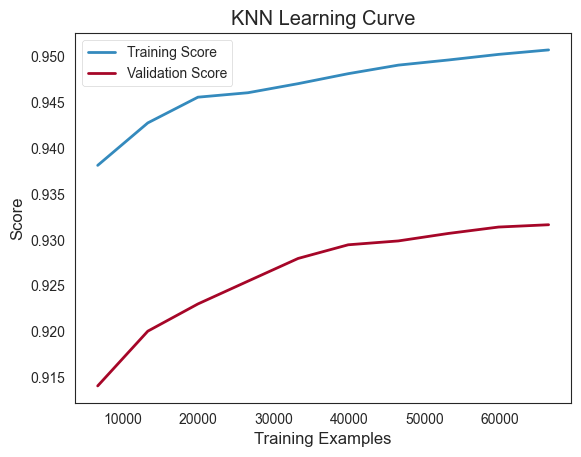

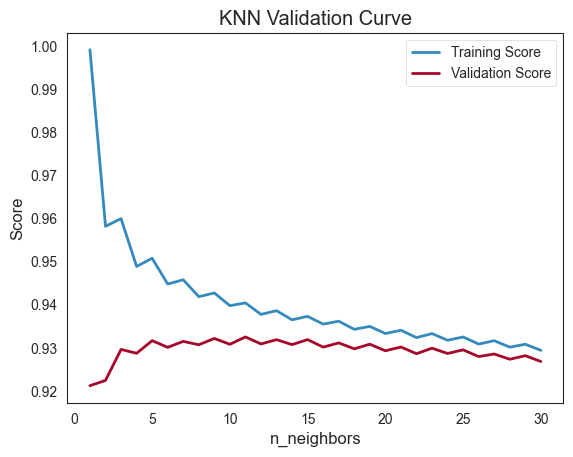

In [85]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve

# KNN modeli oluşturun
model_knn = KNeighborsClassifier(n_neighbors=5)

# Learning Curve oluşturun
train_sizes, train_scores, valid_scores = learning_curve(model_knn, X_train, y_train.values.ravel(), train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Learning Curve'u çizin
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(valid_scores, axis=1), label='Validation Score')
plt.title('KNN Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

# Validation Curve oluşturun
param_range = range(1, 31)
train_scores, valid_scores = validation_curve(model_knn, X_train, y_train.values.ravel(), param_name='n_neighbors', param_range=param_range, cv=5)

# Validation Curve'u çizin
plt.figure()
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(param_range, np.mean(valid_scores, axis=1), label='Validation Score')
plt.title('KNN Validation Curve')
plt.xlabel('n_neighbors')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()



### 1.Grafik: KNN Learning Curve (Öğrenme Eğrisi)

Mavi çizgi, modelin eğitim verisi üzerindeki başarısını gösterir.
Başlangıçta eğitim skoru oldukça yüksek ve 0.950 civarında, ancak eğitim örneklerinin sayısı arttıkça skor biraz düşüyor ve 0.950'nin altında sabitleniyor.
Bu, modelin eğitim verisi üzerindeki başarısının oldukça iyi olduğunu, ancak örnek sayısı arttıkça modelin daha fazla genelleme yaparak eğitim verisine tamamen uymadığını gösterir.
Kırmızı çizgi, modelin doğrulama verisi üzerindeki başarısını gösterir.
Eğitim örneklerinin sayısı arttıkça doğrulama skoru düzenli olarak artar ve yaklaşık 0.925 seviyesine ulaşır.
Bu, modelin daha fazla eğitim verisi ile daha iyi genelleme yapabildiğini ve doğrulama verisi üzerindeki performansının arttığını gösterir.
- Eğitim skoru başlangıçta yüksek ve sabit kalıyor, ancak doğrulama skoru eğitim örneklerinin sayısı arttıkça düzenli olarak artıyor.
- Bu, daha fazla veri ile modelin doğrulama verisi üzerindeki başarısının arttığını ve daha iyi genelleme yapabildiğini gösterir.
- Eğitim ve doğrulama skorları arasındaki fark, modelin aşırı öğrenme (overfitting) veya az öğrenme (underfitting) yapıp yapmadığını anlamak için önemlidir. Bu grafikte fark azalıyor, bu da modelin daha iyi genelleme yaptığını ve doğrulama verisi üzerinde daha iyi performans gösterdiğini işaret eder.

### 2.Grafik: KNN Validation Curve (Doğrulama Eğrisi)

Mavi çizgi, farklı komşu sayıları (n_neighbors) için eğitim verisi üzerindeki başarısını gösterir.
Grafik, komşu sayısı arttıkça eğitim skorunun düştüğünü gösterir.
Başlangıçta, komşu sayısı 1 iken eğitim skoru yaklaşık 1.0'da (tam başarı) olup, bu durum modelin eğitim verisine tamamen uyduğunu ve aşırı öğrenme yaptığını gösterir.
Komşu sayısı arttıkça eğitim skoru hızla düşer ve daha stabil bir değere gelir (0.92 civarında).
Kırmızı çizgi, farklı komşu sayıları için doğrulama verisi üzerindeki başarısını gösterir.
Başlangıçta, komşu sayısı 1 iken doğrulama skoru düşüktür ve yaklaşık 0.92 seviyesindedir.
Komşu sayısı arttıkça doğrulama skoru biraz artar, ancak sonra sabit kalır ve yaklaşık 0.925 seviyesinde dalgalanır.
Bu, modelin komşu sayısı arttıkça aşırı öğrenme probleminin azaldığını ve doğrulama verisi üzerindeki performansının daha istikrarlı hale geldiğini gösterir.
- Eğitim skoru başlangıçta çok yüksek olup (komşu sayısı az iken) aşırı öğrenme olduğunu gösterir.
- Doğrulama skoru başlangıçta düşük olup (komşu sayısı az iken) genelleme problemleri olduğunu gösterir.
- Komşu sayısı arttıkça eğitim skoru düşer ve doğrulama skoru artar, bu da modelin daha iyi genelleme yaptığını ve aşırı öğrenme probleminin azaldığını gösterir.
- Ancak, komşu sayısı çok arttığında (20'den fazla) doğrulama skoru fazla değişmez ve sabit kalır, bu da optimal komşu sayısının 10-20 arası olabileceğini gösterir.

Bu grafikler, KNN modelinin performansını değerlendirirken eğitim ve doğrulama verileri üzerindeki etkileri incelemeye yardımcı olur ve optimal komşu sayısının belirlenmesi için önemli bilgiler sağlar.

### Part 10. Further Performance Improvement & Conclusions
- a) Can you propose any other improvement techniques?
- b) Implement your improvement techniques and show results.
- c) Give objective comments on your findings. Did you achieve your goal in the project? Explain your difficulties

In [86]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model_rf.fit(X_train, y_train.values.ravel())

# Predict on the test set
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9359511091862759
Confusion Matrix:
 [[11171   542]
 [  789  8279]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.95      0.94     11713
         1.0       0.94      0.91      0.93      9068

    accuracy                           0.94     20781
   macro avg       0.94      0.93      0.93     20781
weighted avg       0.94      0.94      0.94     20781




#### Doğruluk (Accuracy)
Modelin doğruluğu yaklaşık %93.6. Bu, modelin test verisindeki örneklerin %93.6'sını doğru bir şekilde sınıflandırdığı anlamına gelir. Yüksek bir doğruluk oranı, modelin genelde iyi performans gösterdiğini gösterir.

#### Karışıklık Matrisi (Confusion Matrix)
- Karışıklık matrisi, modelin performansını dört bileşenle özetler:
  - *11171 (True Positives - TP):* Doğru şekilde sınıf 0 olarak sınıflandırılan örnekler.
  - *542 (False Negatives - FN):* Yanlış şekilde sınıf 1 olarak sınıflandırılan sınıf 0 örnekler.
  - *789 (False Positives - FP):* Yanlış şekilde sınıf 0 olarak sınıflandırılan sınıf 1 örnekler.
  - *8279 (True Negatives - TN):* Doğru şekilde sınıf 1 olarak sınıflandırılan örnekler.

  Bu matris, modelin ne kadar iyi performans gösterdiğini belirlemek için kullanılır. Örneğin:
  - *Doğru Pozitifler ve Doğru Negatifler:* Modelin doğru yaptığı sınıflandırmalardır.
  - *Yanlış Pozitifler ve Yanlış Negatifler:* Modelin yanlış yaptığı sınıflandırmalardır.

  Bu durumda:
  - Model, 11171 sınıf 0 örneğini doğru sınıflandırmış.
  - Model, 8279 sınıf 1 örneğini doğru sınıflandırmış.
  - Model, 542 sınıf 0 örneğini yanlış sınıf 1 olarak sınıflandırmış.
  - Model, 789 sınıf 1 örneğini yanlış sınıf 0 olarak sınıflandırmış.

#### Sınıflandırma Raporu (Classification Report)
- Sınıflandırma raporu, modelin her sınıf için performansını çeşitli metriklerle özetler:
  - *Precision (Kesinlik):* Belirli bir sınıf için yapılan doğru pozitif tahminlerin, o sınıf için yapılan toplam pozitif tahminlere oranıdır.
    - Sınıf 0 için kesinlik: 0.93
    - Sınıf 1 için kesinlik: 0.94
  - *Recall (Duyarlılık):* Belirli bir sınıf için yapılan doğru pozitif tahminlerin, o sınıfa ait toplam gerçek örnek sayısına oranıdır.
    - Sınıf 0 için duyarlılık: 0.95
    - Sınıf 1 için duyarlılık: 0.91
  - *F1-Score:* Kesinlik ve duyarlılığın harmonik ortalamasıdır. Hem kesinlik hem de duyarlılık arasında bir denge sağlar.
    - Sınıf 0 için F1-skoru: 0.94
    - Sınıf 1 için F1-skoru: 0.93

- *Support (Destek):* Her sınıf için gerçek örnek sayısını belirtir.
  - Sınıf 0 için destek: 11713
  - Sınıf 1 için destek: 9068

- *Genel Değerlendirme:*
  - *Accuracy (Doğruluk):* Tüm örneklerin doğru sınıflandırma oranıdır. Bu durumda doğruluk %93.6'dır.
  - *Macro Average:* Her sınıfın metriklerinin aritmetik ortalamasıdır (eşit ağırlıklı).
  - *Weighted Average:* Her sınıfın metriklerinin, o sınıfın destek değeri ile ağırlıklandırılmış ortalamasıdır.

Bu çıktılar, modelin genel olarak her iki sınıf için de yüksek performans gösterdiğini ve dengeli bir şekilde çalıştığını gösterir. Kesinlik, duyarlılık ve F1-skora bakıldığında, modelin her iki sınıf için de güçlü bir performans sergilediği anlaşılmaktadır.

Random Forest modelinin yüksek doğruluğunun temel nedenleri arasında overfitting'in azaltılması, düşük bias ve düşük varyans kombinasyonu, dengeli özellik seçimi ve esneklik yer almaktadır. Bu faktörler, modelin veri üzerindeki genelleme yeteneğini artırarak daha doğru ve güvenilir tahminler yapmasını sağlar.

In [87]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train Logistic Regression with polynomial features
model_lr_poly = LogisticRegression(C=0.34488521115218396, penalty='l2', solver='liblinear')
model_lr_poly.fit(X_poly, y_train.values.ravel())

# Predict on the test set
y_pred_lr_poly = model_lr_poly.predict(X_test_poly)

# Evaluate the model
accuracy_lr_poly = accuracy_score(y_test, y_pred_lr_poly)
print("Logistic Regression with Polynomial Features Accuracy:", accuracy_lr_poly)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr_poly))
print("Classification Report:\n", classification_report(y_test, y_pred_lr_poly))


Logistic Regression with Polynomial Features Accuracy: 0.9227659881622636
Confusion Matrix:
 [[11059   654]
 [  951  8117]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.94      0.93     11713
         1.0       0.93      0.90      0.91      9068

    accuracy                           0.92     20781
   macro avg       0.92      0.92      0.92     20781
weighted avg       0.92      0.92      0.92     20781



#### Doğruluk (Accuracy)
- Modelin doğruluğu yaklaşık %92.3. Bu, modelin test verisindeki örneklerin %92.3'ünü doğru bir şekilde sınıflandırdığı anlamına gelir.

#### Karışıklık Matrisi (Confusion Matrix)

- Karışıklık matrisi, modelin performansını dört bileşenle özetler:
  - *11059 (True Positives - TP):* Doğru şekilde sınıf 0 olarak sınıflandırılan örnekler.
  - *654 (False Negatives - FN):* Yanlış şekilde sınıf 1 olarak sınıflandırılan sınıf 0 örnekler.
  - *951 (False Positives - FP):* Yanlış şekilde sınıf 0 olarak sınıflandırılan sınıf 1 örnekler.
  - *8117 (True Negatives - TN):* Doğru şekilde sınıf 1 olarak sınıflandırılan örnekler.

  Bu matris, modelin ne kadar iyi performans gösterdiğini belirlemek için kullanılır. Örneğin:
  - *Doğru Pozitifler ve Doğru Negatifler:* Modelin doğru yaptığı sınıflandırmalardır.
  - *Yanlış Pozitifler ve Yanlış Negatifler:* Modelin yanlış yaptığı sınıflandırmalardır.

#### Sınıflandırma Raporu (Classification Report)
- Sınıflandırma raporu, modelin her sınıf için performansını çeşitli metriklerle özetler:
  - *Precision (Kesinlik):* Belirli bir sınıf için yapılan doğru pozitif tahminlerin, o sınıf için yapılan toplam pozitif tahminlere oranıdır.
    - Sınıf 0 için kesinlik: 0.92
    - Sınıf 1 için kesinlik: 0.93
  - *Recall (Duyarlılık):* Belirli bir sınıf için yapılan doğru pozitif tahminlerin, o sınıfa ait toplam gerçek örnek sayısına oranıdır.
    - Sınıf 0 için duyarlılık: 0.94
    - Sınıf 1 için duyarlılık: 0.90
  - *F1-Score:* Kesinlik ve duyarlılığın harmonik ortalamasıdır. Hem kesinlik hem de duyarlılık arasında bir denge sağlar.
    - Sınıf 0 için F1-skoru: 0.93
    - Sınıf 1 için F1-skoru: 0.92

- *Support (Destek):* Her sınıf için gerçek örnek sayısını belirtir.
  - Sınıf 0 için destek: 11713
  - Sınıf 1 için destek: 9068

- *Genel Değerlendirme:*
  - *Accuracy (Doğruluk):* Tüm örneklerin doğru sınıflandırma oranıdır. Bu durumda doğruluk %92.3'tür.
  - *Macro Average:* Her sınıfın metriklerinin aritmetik ortalamasıdır (eşit ağırlıklı).
  - *Weighted Average:* Her sınıfın metriklerinin, o sınıfın destek değeri ile ağırlıklandırılmış ortalamasıdır.

Bu çıktılar, modelin genel olarak her iki sınıf için de yüksek performans gösterdiğini ve dengeli bir şekilde çalıştığını gösterir. Kesinlik, duyarlılık ve F1-skora bakıldığında, modelin her iki sınıf için de güçlü bir performans sergilediği anlaşılmaktadır.

### Sonuç
- *Random Forest Modeli*: %93.6 doğruluk ile yüksek performans gösteriyor.
- *Polynomial Özelliklerle Lojistik Regresyon Modeli*: %92.3 doğruluk ile iyi performans gösteriyor, ancak Random Forest modelinden biraz daha düşük.

Her iki model de iyi performans gösteriyor ancak Random Forest modeli, özellikle doğruluk açısından daha üstün. Bu, model seçiminde dikkate alınması gereken önemli bir faktördür.

Polinomiyal özellikler kullanıldığında doğruluk oranının 0.865'ten 0.923'e çıkması, özellik alanını doğrusal olmayan terimleri de içerecek şekilde genişletmenin, modelin verideki karmaşık ilişkileri daha iyi yakalamasını ve bu nedenle performansının artmasını sağladığını göstermektedir.